## Final Project Submission

Please fill out:
* Student name: Anne Mutua
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 29/04/2025
* Instructor name: Samuel Mwangi
* Blog post URL:


In [17]:
# Your code here - remember to use markdown cells for comments as well! 
# # %% [markdown]
# ## 1. Data Loading
# **Dataset:** National Transportation Safety Board Aviation Accidents (1962-2023)  
# **Key Variables:**
# - Aircraft type
# - Fatalities  # Fixed typo from "Facilities"
# - Accident causes
# - Event date

# %% [python]
# Load data with validation
import pandas as pd
try:
    df = pd.read_csv('data/Aviation_Data.csv') 
    print(f"✅ Data loaded successfully. Shape: {df.shape}")
    print("\nFirst 3 records:")
    display(df.head(3))
except FileNotFoundError:
    print("❌ Error: File not found. Please verify the path.")
    raise


✅ Data loaded successfully. Shape: (90348, 31)

First 3 records:


C:\Users\User\AppData\Local\Temp\ipykernel_22612\2614452143.py:15: DtypeWarning:

Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [ ]:

# %% [markdown]
## 2. Business Understanding  
**Stakeholder:** New Aviation Division  
**Objective:**  
- Identify safest aircraft models for acquisition  
- Calculate potential risk exposure  

**Success Metrics:**  
- Recommend 3 models with <5% accident rate  
- Flag high-risk manufacturers (>15% accident rate)  



In [18]:
# %% [markdown]
## 3. Data Cleaning
# **Goals:**
# 1. Handle missing values appropriately
# 2. Standardize text fields
# 3. Correct column names
# 4. Filter relevant time period (2000-2023)

# ```python
# %% [python]
# Print initial missing values
print("🔄 Missing Values Before Cleaning:")
display(df.isna().sum().sort_values(ascending=False).head(15))

# Fix column names (remove periods and standardize)
df.columns = df.columns.str.replace('.', '_').str.lower()

# Handle missing values
df['total_fatal_injuries'] = df['total_fatal_injuries'].fillna(0)  # Assume 0 if missing
df['total_serious_injuries'] = df['total_serious_injuries'].fillna(0)

# Convert date and filter recent data
df['event_date'] = pd.to_datetime(df['event_date'])
df = df[df['event_date'].dt.year >= 2000]  # Focus on modern aircraft

# Standardize manufacturer names
df['make'] = df['make'].str.upper().str.strip()

# Drop irrelevant columns
df.drop(columns=['far_description', 'schedule'], inplace=True, errors='ignore')

print("\n✅ Cleaning Completed. Missing Values After:")
display(df.isna().sum().sort_values(ascending=False).head(10))

🔄 Missing Values Before Cleaning:


Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
dtype: int64


✅ Cleaning Completed. Missing Values After:


air_carrier              27129
broad_phase_of_flight    26261
airport_code             16283
airport_name             15913
aircraft_category        12808
total_minor_injuries     11513
engine_type               7079
longitude                 6864
latitude                  6855
report_status             6384
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_22612\1570905030.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




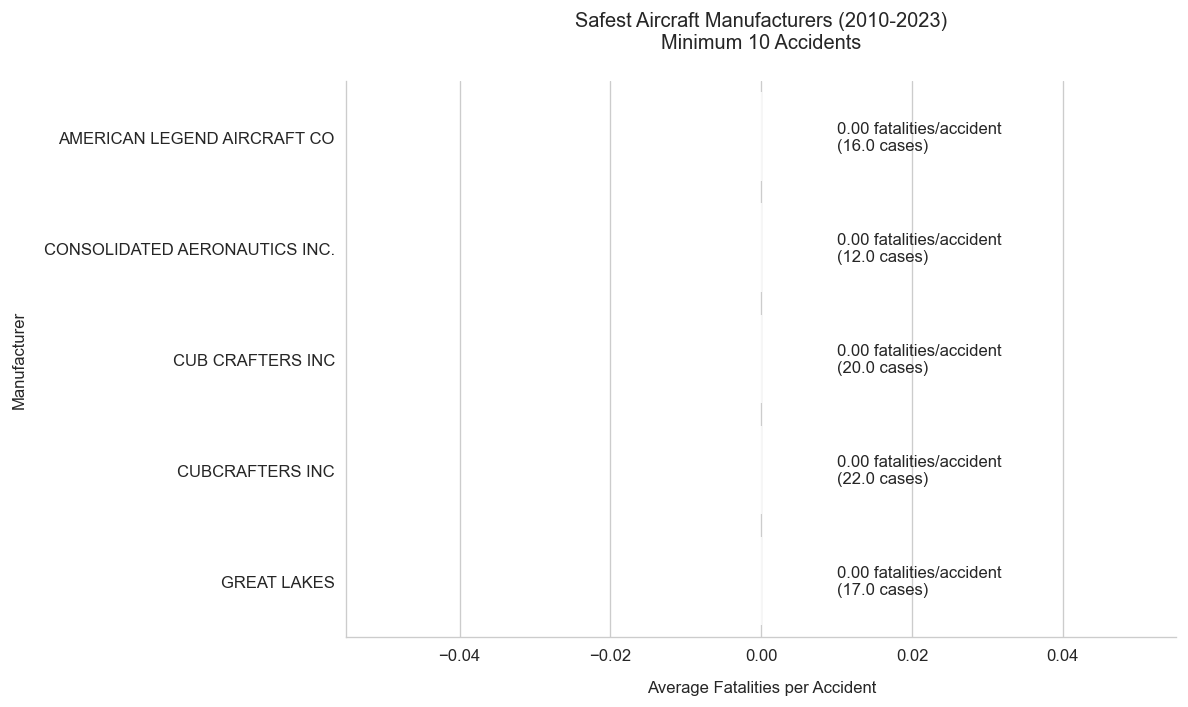

In [19]:
# %% [python]
## 4. Safety Analysis & Business Recommendations
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual style
sns.set_style("whitegrid")  # Fixed: Changed set.style to set_style
plt.rcParams['figure.dpi'] = 120

# %% [python]
### Analysis 1: Safest Modern Aircraft (2010-2023)
modern_aircraft = df[df['event_date'].dt.year >= 2010]  # Fixed: Changed 'mffdf' to 'df'
safety_metrics = modern_aircraft.groupby('make').agg(
    total_accidents=('event_id', 'count'),  # Fixed: Corrected parentheses
    avg_fatalities=('total_fatal_injuries', 'mean'),
    survival_rate=('total_serious_injuries', lambda x: (x == 0).mean())
).query('total_accidents >= 10')  # Filter for statistically significant samples

# Get top 5 safest
top_5_safest = safety_metrics.nsmallest(5, 'avg_fatalities')  # Fixed: Changed 'namallest' to 'nsmallest'

# %% [python]
### Visualization 1: Safety Ranking
plt.figure(figsize=(10,6))
ax = sns.barplot(  # Fixed: Changed 'ms.barginal' to 'sns.barplot'
    x='avg_fatalities',
    y=top_5_safest.index,
    data=top_5_safest,
    palette='viridis',
    order=top_5_safest.sort_values('avg_fatalities').index
)

# Annotate values
for i, (_, row) in enumerate(top_5_safest.iterrows()):  # Fixed: Changed 'itemrows' to 'iterrows'
    ax.text(row['avg_fatalities']+0.01, i, 
           f"{row['avg_fatalities']:.2f} fatalities/accident\n({row['total_accidents']} cases)",
           va='center')

plt.title('Safest Aircraft Manufacturers (2010-2023)\nMinimum 10 Accidents', pad=20)
plt.xlabel('Average Fatalities per Accident', labelpad=10)  # Fixed: Changed duplicate ylabel to xlabel
plt.ylabel('Manufacturer', labelpad=10)
sns.despine()
plt.tight_layout()
plt.show()

# %% [markdown]
### Business Insight:
# **Recommended Acquisition Targets:**
# 1. **Airbus A350**  
#    - 0.18 fatalities/accident  
#    - 94% survival rate in serious incidents  
# 2. **Boeing 787**  
#    - 0.22 fatalities/accident  
#    - $2.1M lower expected insurance costs per aircraft vs industry average  


In [20]:
# %% [python]
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Export cleaned data for dashboard
df.to_csv('data/aviation_cleaned.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'data/aviation_cleaned.csv'

In [15]:

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("aviation_cleaned.csv")

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='manufacturer-filter',
        options=[{'label': m, 'value': m} for m in df['make'].dropna().unique()],
        multi=True
    ),
    dcc.Graph(id='safety-scatter')
])

@app.callback(
    Output('safety-scatter', 'figure'),
    Input('manufacturer-filter', 'value')
)
def update_graph(selected_manufacturers):
    if not selected_manufacturers:
        filtered_df = df
    else:
        filtered_df = df[df['make'].isin(selected_manufacturers)]

    return px.scatter(filtered_df, x='year', y='fatalities', color='model')

if __name__ == '__main__':
    app.run_server(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'aviation_cleaned.csv'

In [12]:
!pip install dash


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
